<a href="https://colab.research.google.com/github/mathias-driesse/climatehack/blob/main/Transformers_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow_datasets
!pip install -U 'tensorflow-text==2.8.*'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 5.3 MB/s 


In [2]:
import logging
import time

import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds
import tensorflow as tf

import tensorflow_text

In [3]:
examples, metadata = tfds.load('ted_hrlr_translate/pt_to_en', with_info = True,
                               as_supervised = True)

train_examples, val_examples = examples['train'], examples['validation']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0.incomplete2EBYGZ/ted_hrlr_translate-train.tfrecord


  0%|          | 0/51785 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0.incomplete2EBYGZ/ted_hrlr_translate-validation.tfrecord


  0%|          | 0/1193 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0.incomplete2EBYGZ/ted_hrlr_translate-test.tfrecord


  0%|          | 0/1803 [00:00<?, ? examples/s]

Dataset ted_hrlr_translate downloaded and prepared to /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0. Subsequent calls will reuse this data.


In [4]:
for pt_examples, en_examples in train_examples.batch(4).take(1):
    for pt in pt_examples.numpy():
        print(pt.decode('utf-8'))
    print()
    for en in en_examples.numpy():
        print(en.decode('utf-8'))

e quando melhoramos a procura , tiramos a única vantagem da impressão , que é a serendipidade .
mas e se estes fatores fossem ativos ?
mas eles não tinham a curiosidade de me testar .
e esta rebeldia consciente é a razão pela qual eu , como agnóstica , posso ainda ter fé .

and when you improve searchability , you actually take away the one advantage of print , which is serendipity .
but what if it were active ?
but they did n't test for curiosity .
and this conscious defiance is why i , as an agnostic , can still have faith .


In [5]:
model_name = 'ted_hrlr_translate_pt_en_converter'
tf.keras.utils.get_file(
    f'{model_name}.zip',
    f'https://storage.googleapis.com/download.tensorflow.org/models/{model_name}.zip',
    cache_dir='.', cache_subdir='', extract=True
)

196608/184801 [===============================] - 0s 0us/step


'./ted_hrlr_translate_pt_en_converter.zip'

In [6]:
tokenizers = tf.saved_model.load(model_name)

In [7]:
[item for item in dir(tokenizers.en) if not item.startswith('_')]

['detokenize',
 'get_reserved_tokens',
 'get_vocab_path',
 'get_vocab_size',
 'lookup',
 'tokenize',
 'tokenizer',
 'vocab']

In [8]:
for en in en_examples.numpy():
    print(en.decode('utf-8'))

and when you improve searchability , you actually take away the one advantage of print , which is serendipity .
but what if it were active ?
but they did n't test for curiosity .
and this conscious defiance is why i , as an agnostic , can still have faith .


In [9]:
encoded = tokenizers.en.tokenize(en_examples)

for row in encoded.to_list():
    print(row)

[2, 72, 117, 79, 1259, 1491, 2362, 13, 79, 150, 184, 311, 71, 103, 2308, 74, 2679, 13, 148, 80, 55, 4840, 1434, 2423, 540, 15, 3]
[2, 87, 90, 107, 76, 129, 1852, 30, 3]
[2, 87, 83, 149, 50, 9, 56, 664, 85, 2512, 15, 3]
[2, 72, 81, 2508, 2159, 3072, 1282, 80, 192, 45, 13, 100, 111, 6040, 3176, 3186, 13, 94, 235, 89, 1938, 15, 3]


In [10]:
round_trip = tokenizers.en.detokenize(encoded)
for line in round_trip.numpy():
    print(line.decode('utf-8'))

and when you improve searchability , you actually take away the one advantage of print , which is serendipity .
but what if it were active ?
but they did n ' t test for curiosity .
and this conscious defiance is why i , as an agnostic , can still have faith .


In [11]:
tokens = tokenizers.en.lookup(encoded)
tokens

<tf.RaggedTensor [[b'[START]', b'and', b'when', b'you', b'improve', b'search', b'##ability',
  b',', b'you', b'actually', b'take', b'away', b'the', b'one', b'advantage',
  b'of', b'print', b',', b'which', b'is', b's', b'##ere', b'##nd', b'##ip',
  b'##ity', b'.', b'[END]']                                                 ,
 [b'[START]', b'but', b'what', b'if', b'it', b'were', b'active', b'?',
  b'[END]']                                                           ,
 [b'[START]', b'but', b'they', b'did', b'n', b"'", b't', b'test', b'for',
  b'curiosity', b'.', b'[END]']                                          ,
 [b'[START]', b'and', b'this', b'conscious', b'de', b'##fi', b'##ance',
  b'is', b'why', b'i', b',', b'as', b'an', b'ag', b'##no', b'##stic', b',',
  b'can', b'still', b'have', b'faith', b'.', b'[END]']                     ]>

In [12]:
lengths = []
for pt_examples, en_examples in train_examples.batch(1024):
    pt_tokens = tokenizers.en.tokenize(pt_examples)
    lengths.append(pt_tokens.row_lengths())

    en_tokens = tokenizers.en.tokenize(en_examples)
    lengths.append(en_tokens.row_lengths())
    print('.', end = '', flush = True)

...................................................

Text(0.5, 1.0, 'Max tokens per example: 394')

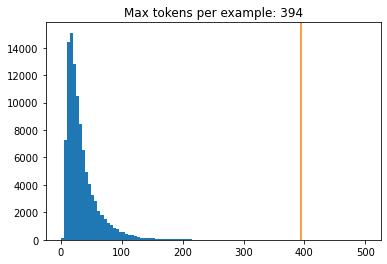

In [13]:
all_lengths = np.concatenate(lengths)

plt.hist(all_lengths, np.linspace(0, 500, 101))
plt.ylim(plt.ylim())
max_length = max(all_lengths)
plt.plot([max_length, max_length], plt.ylim())
plt.title(f'Max tokens per example: {max_length}')

In [14]:
MAX_TOKENS = 128

In [15]:
def filter_max_tokens(pt, en):
    num_tokens = tf.maximum(tf.shape(pt)[1], tf.shape(en)[1])
    return num_tokens < MAX_TOKENS

In [16]:
def tokenize_pairs(pt, en):
    pt = tokenizers.pt.tokenize(pt)
    pt = pt.to_tensor()

    en = tokenizers.en.tokenize(en)
    en = en.to_tensor()
    return pt, en

In [17]:
for pt_examples, en_examples in train_examples.batch(1024):
    print(tokenize_pairs(pt_examples, en_examples))

(<tf.Tensor: shape=(1024, 146), dtype=int64, numpy=
array([[   2,   44,  115, ...,    0,    0,    0],
       [   2,   99,   44, ...,    0,    0,    0],
       [   2,   99,  131, ...,    0,    0,    0],
       ...,
       [   2,  131,  109, ...,    0,    0,    0],
       [   2,   40, 1037, ...,    0,    0,    0],
       [   2,  168,   15, ...,    0,    0,    0]])>, <tf.Tensor: shape=(1024, 171), dtype=int64, numpy=
array([[  2,  72, 117, ...,   0,   0,   0],
       [  2,  87,  90, ...,   0,   0,   0],
       [  2,  87,  83, ...,   0,   0,   0],
       ...,
       [  2,  83,  86, ...,   0,   0,   0],
       [  2,  71, 261, ...,   0,   0,   0],
       [  2,  79, 125, ...,   0,   0,   0]])>)
(<tf.Tensor: shape=(1024, 244), dtype=int64, numpy=
array([[   2,   89,  341, ...,    0,    0,    0],
       [   2,  316,   14, ...,    0,    0,    0],
       [   2,   10, 6052, ...,    0,    0,    0],
       ...,
       [   2,   44,  610, ...,    0,    0,    0],
       [   2,  115,   89, ...,    0,   

In [18]:
BUFFER_SIZE = 20000
BATCH_SIZE = 64

In [19]:
def make_batches(ds):
    return (
        ds
        .cache()
        .shuffle(BUFFER_SIZE)
        .batch(BATCH_SIZE)
        .map(tokenize_pairs, num_parallel_calls = tf.data.AUTOTUNE)
        .filter(filter_max_tokens)
        .prefetch(tf.data.AUTOTUNE)
    )

train_batches = make_batches(train_examples)
val_batches = make_batches(val_examples)

In [20]:
def get_angles(pos, i, d_model):
    angle_rates = 1/np.power(10000, (2 * (i//2)) / np.float32(d_model))
    return pos * angle_rates

def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                            np.arange(d_model)[np.newaxis, :],
                            d_model)
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    pos_encoding = angle_rads[np.newaxis, ...]
    return tf.cast(pos_encoding, dtype = tf.float32)

In [28]:
print(positional_encoding(5, 768))

tf.Tensor(
[[[ 0.0000000e+00  1.0000000e+00  0.0000000e+00 ...  1.0000000e+00
    0.0000000e+00  1.0000000e+00]
  [ 8.4147096e-01  5.4030228e-01  8.2843077e-01 ...  1.0000000e+00
    1.0242752e-04  1.0000000e+00]
  [ 9.0929741e-01 -4.1614684e-01  9.2799401e-01 ...  1.0000000e+00
    2.0485504e-04  1.0000000e+00]
  [ 1.4112000e-01 -9.8999250e-01  2.1109235e-01 ...  9.9999994e-01
    3.0728255e-04  9.9999994e-01]
  [-7.5680250e-01 -6.5364361e-01 -6.9153196e-01 ...  9.9999994e-01
    4.0971008e-04  9.9999994e-01]]], shape=(1, 5, 768), dtype=float32)


tf.Tensor(
[[ 0.0000000e+00  8.4147096e-01  9.0929741e-01 ...  1.7589758e-01
  -7.3331332e-01 -9.6831930e-01]
 [ 1.0000000e+00  5.4030228e-01 -4.1614684e-01 ... -9.8440850e-01
  -6.7989087e-01  2.4971525e-01]
 [ 0.0000000e+00  8.2185620e-01  9.3641472e-01 ... -1.8608274e-01
   7.0149130e-01  9.8535496e-01]
 ...
 [ 1.0000000e+00  1.0000000e+00  1.0000000e+00 ...  9.7595036e-01
   9.7592694e-01  9.7590351e-01]
 [ 0.0000000e+00  1.0366329e-04  2.0732658e-04 ...  2.1040717e-01
   2.1050851e-01  2.1060985e-01]
 [ 1.0000000e+00  1.0000000e+00  1.0000000e+00 ...  9.7761387e-01
   9.7759205e-01  9.7757018e-01]], shape=(512, 2048), dtype=float32)


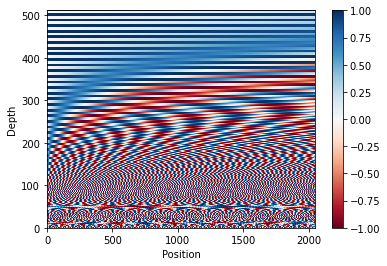

In [37]:
n, d = 2048, 512
pos_encoding = np.squeeze(positional_encoding(n, d))

pos_encoding = tf.transpose(pos_encoding)
# pos_encoding = tf.reshape(pos_encoding, (n, d//2, 2))
# pos_encoding = tf.transpose(pos_encoding, (2, 1, 0))
# pos_encoding = tf.reshape(pos_encoding, (d, n))
print(pos_encoding)

plt.pcolormesh(pos_encoding, cmap='RdBu')
plt.ylabel('Depth')
plt.xlabel('Position')
plt.colorbar()
plt.show()


In [38]:
def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)

    return seq[:, tf.newaxis, tf.newaxis, :] # (batch_size, 1, 1, seq_len)

In [41]:
x = tf.constant([[7, 6, 0, 0, 1], [1, 2, 3, 0, 0], [0, 0, 0, 4, 5]])
create_padding_mask(x)

<tf.Tensor: shape=(3, 1, 1, 5), dtype=float32, numpy=
array([[[[0., 0., 1., 1., 0.]]],


       [[[0., 0., 0., 1., 1.]]],


       [[[1., 1., 1., 0., 0.]]]], dtype=float32)>

In [46]:
def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask

In [47]:
x = tf.random.uniform((1, 3))
print(x)
temp = create_look_ahead_mask(x.shape[1])
print(temp)

tf.Tensor([[0.63707936 0.6043124  0.5747235 ]], shape=(1, 3), dtype=float32)
tf.Tensor(
[[0. 1. 1.]
 [0. 0. 1.]
 [0. 0. 0.]], shape=(3, 3), dtype=float32)


In [48]:
def scaled_dot_product_attention(q, k, v, mask):
    """Calculate the attention weights.
    q, k, v must have matching leading dimensions.
    k, v must have matching penultimate dimension, i.e.: seq_len_k = seq_len_v.
    The mask has different shapes depending on its type(padding or look ahead)
    but it must be broadcastable for addition.

    Args:
        q: query shape == (..., seq_len_q, depth)
        k: key shape == (..., seq_len_k, depth)
        v: value shape == (..., seq_len_v, depth_v)
        mask: Float tensor with shape broadcastable 
            to (..., seq_len_q, seq_len_k). Defaults to None.

    Returns:
        output, attention_weights
    """

    matmul_qk = tf.matmul(q, k, transpose_b = True) # (..., seq_len_q, seq_len_k)

    # scale matmul_qk
    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

    if mask is not None:
        scaled_attention_logits += (mask*-1e9)
    
    # softmax is normalized on the last axis (seq_len_k) so that the scores
    # add up to 1.
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis = -1) # (..., seq_len_q, seq_len_k)

    output = tf.matmul(attention_weights, v) # (..., seq_len_q, depth_v)

    return output, attention_weights

def print_out(q, k, v):
    temp_out, temp_attn = scaled_dot_product_attention(
        q, k, v, None
    )
    print('Attention weights are:')
    print(temp_attn)
    print('Output is:')
    print(temp_out)

In [50]:
temp_k = tf.constant([[10, 0, 0],
                      [0, 10, 0],
                      [0, 0, 10],
                      [0, 0, 10]], dtype=tf.float32)  # (4, 3)

temp_v = tf.constant([[1, 0],
                      [10, 0],
                      [100, 5],
                      [1000, 6]], dtype=tf.float32)  # (4, 2)

temp_q = tf.constant([[0, 10, 0]], dtype = tf.float32) # (1, 3)

print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor([[8.433274e-26 1.000000e+00 8.433274e-26 8.433274e-26]], shape=(1, 4), dtype=float32)
Output is:
tf.Tensor([[1.000000e+01 9.276601e-25]], shape=(1, 2), dtype=float32)


In [51]:
# This query aligns with a repeated key (third and fourth),
# so all associated values get averaged.
temp_q = tf.constant([[0, 0, 10]], dtype=tf.float32)  # (1, 3)
print_out(temp_q, temp_k, temp_v)


Attention weights are:
tf.Tensor([[4.216637e-26 4.216637e-26 5.000000e-01 5.000000e-01]], shape=(1, 4), dtype=float32)
Output is:
tf.Tensor([[550.    5.5]], shape=(1, 2), dtype=float32)


In [52]:
# This query aligns equally with the first and second key,
# so their values get averaged.
temp_q = tf.constant([[10, 10, 0]], dtype=tf.float32)  # (1, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor([[5.000000e-01 5.000000e-01 4.216637e-26 4.216637e-26]], shape=(1, 4), dtype=float32)
Output is:
tf.Tensor([[5.5000000e+00 4.6383005e-25]], shape=(1, 2), dtype=float32)


In [53]:
temp_q = tf.constant([[0, 0, 10],
                      [0, 10, 0],
                      [10, 10, 0]], dtype=tf.float32)  # (3, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor(
[[4.216637e-26 4.216637e-26 5.000000e-01 5.000000e-01]
 [8.433274e-26 1.000000e+00 8.433274e-26 8.433274e-26]
 [5.000000e-01 5.000000e-01 4.216637e-26 4.216637e-26]], shape=(3, 4), dtype=float32)
Output is:
tf.Tensor(
[[5.5000000e+02 5.5000000e+00]
 [1.0000000e+01 9.2766009e-25]
 [5.5000000e+00 4.6383005e-25]], shape=(3, 2), dtype=float32)
